### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [88]:
## Import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

london_bike = pd.read_csv("C:/Users/Tamás/Desktop/ESMT/FirstSem/AnalyticsThroughCoding/Analytics-through-coding-in-class/Data/london_bikes.csv")

In [ ]:
london_bike.info()
london_bike.columns
london_bike.describe()

**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [ ]:
## Your code goes here

# Check for the sum of the missing values in each column
london_bike.isnull().sum()

In [91]:
# Making a copy from the original dataset
london_bike_copy = london_bike.copy()

In [92]:
# Changing the datatime in a correct format
london_bike_copy["date"] = pd.to_datetime(london_bike_copy["date"])

In [93]:
# Changing the format of the "month" and "wday" columns to integer with mapping
months_to_int = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
london_bike_copy.loc[:, "month"] = london_bike_copy["month"].map(months_to_int)

days_to_int = {
    'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7
}
london_bike_copy.loc[:, "wday"] = london_bike_copy["wday"].map(days_to_int)

In [94]:
# Convert 'month' and 'wday' columns to integer type
london_bike_copy["month"] = london_bike_copy["month"].astype(int)
london_bike_copy["wday"] = london_bike_copy["wday"].astype(int)

In [ ]:
# Finding columns with missing values
missing_columns = london_bike_copy.columns[london_bike_copy.isnull().any()]

missing_values = pd.DataFrame()
for col in missing_columns:
     missing_values[col] = london_bike_copy[col].describe()

missing_values = missing_values.T
display(missing_values)

In [ ]:
# Filling the missing values in each column 

# CLOUD_COVER - the values are between 0 and 9, the mean is 4.91 and the standard deviation is 2.36, so most of the values are close to the mean. 
# We can fill the missing values with the mean of the column
london_bike_copy["cloud_cover"].fillna(london_bike_copy["cloud_cover"].mean(), inplace=True)

# HUMIDITY - here the range between the min and max value is quite bigger than the previous one as the standard deviation, but the fact that from the
# 4934 row only 83 have missing value, we can use the mean of the columns to fill the missing values.
london_bike_copy["humidity"].fillna(london_bike_copy["humidity"].mean(), inplace=True)

# PRESSURE, RADIATION, MEAN_TEMP, MIN_TEMP, MAX_TEMP - the same situation like at the HUMIDITY. We can fill the missing values with the mean of the column.
london_bike_copy["pressure"].fillna(london_bike_copy["pressure"].mean(), inplace = True)
london_bike_copy["radiation"].fillna(london_bike_copy["radiation"].mean(), inplace = True)
london_bike_copy["mean_temp"].fillna(london_bike_copy["mean_temp"].mean(), inplace = True)
london_bike_copy["min_temp"].fillna(london_bike_copy["min_temp"].mean(), inplace = True)
london_bike_copy["max_temp"].fillna(london_bike_copy["max_temp"].mean(), inplace = True)

# PRECIPITATION, SUNSHINE - Every cell in the row, which should contain numerical data has missing value, 
# there is no option to  compare, so we have to fill these cells with the mean of the column.
london_bike_copy["precipitation"].fillna(london_bike_copy["precipitation"].mean(), inplace = True)
london_bike_copy["sunshine"].fillna(london_bike_copy["sunshine"].mean(), inplace = True)

# SNOW_DEPTH - where the missing values are, these are no winter months, so there were no snow, we can replace the missing values with 0.
london_bike_copy["snow_depth"].fillna(0, inplace = True)

In [107]:
# Create a new 'season' column based on 'month'
months_to_season = [
    london_bike_copy["month"].isin([3, 4, 5]),      # Spring
    london_bike_copy["month"].isin([6, 7, 8]),      # Summer
    london_bike_copy["month"].isin([9, 10, 11]),    # Fall
    london_bike_copy["month"].isin([12, 1, 2])      # Winter
]
options = [1, 2, 3, 4]
london_bike_copy["season"] = np.select(months_to_season, options)

**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



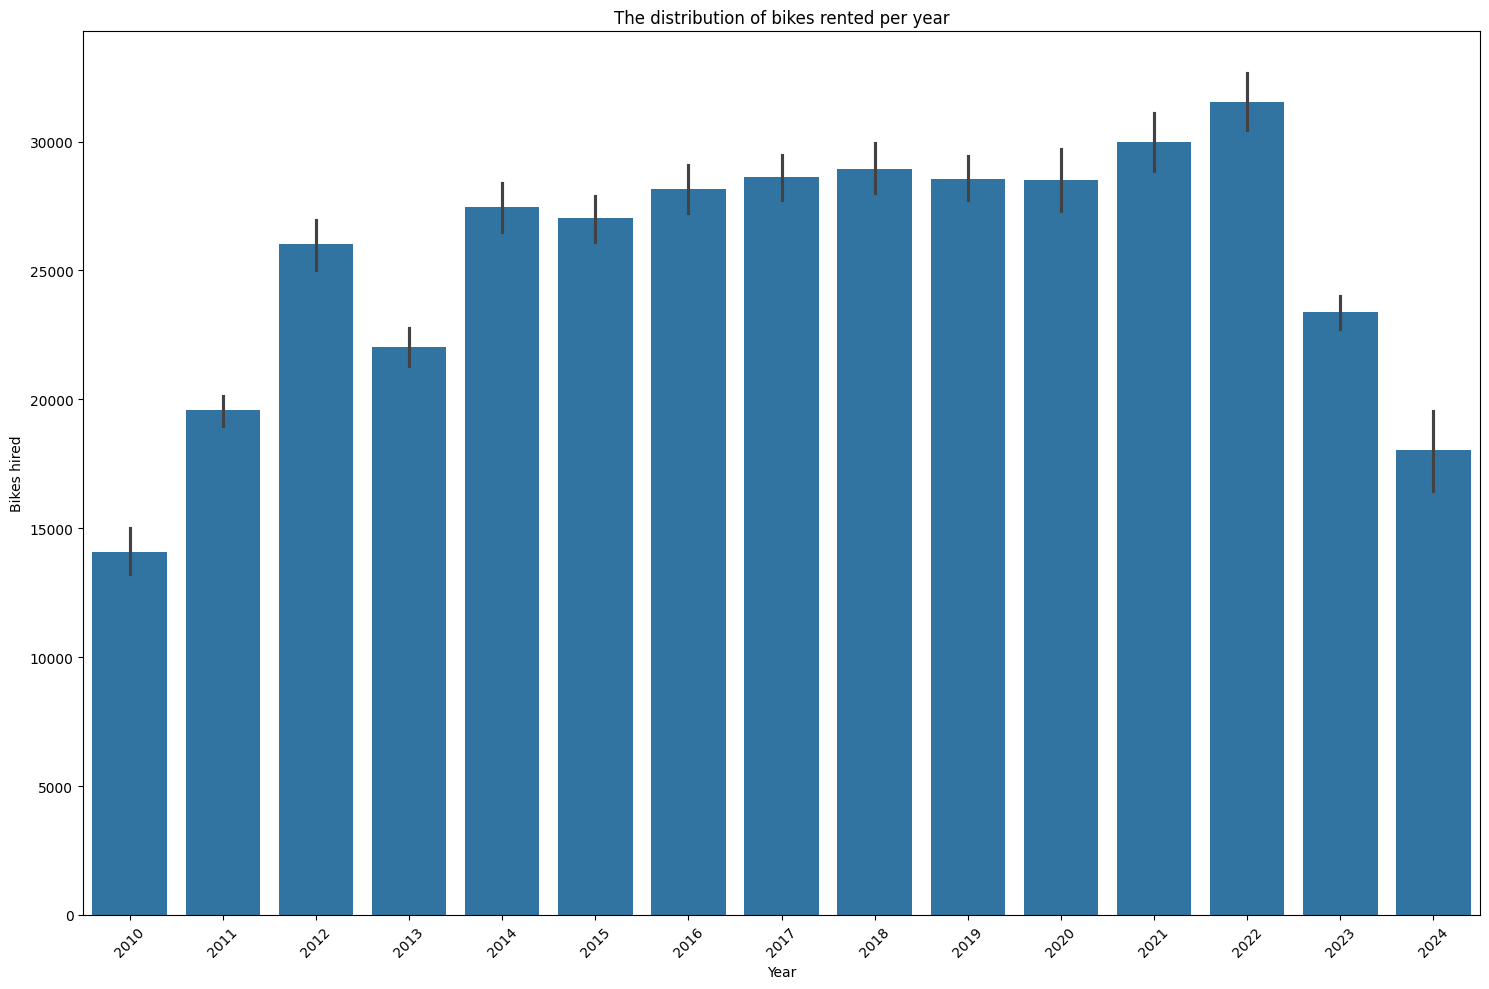

In [111]:
# The distribution of bikes rented per year
plt.figure(figsize=(15, 10))
sns.barplot(data=london_bike_copy, x = "year", y = "bikes_hired")
plt.title("The distribution of bikes rented per year")
plt.xlabel("Year") 
plt.ylabel("Bikes hired")
plt.xticks(rotation = 45)   
plt.tight_layout()
plt.show()

C:\Users\Tamás\AppData\Local\Temp\ipykernel_19620\1968892106.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([season_labels[s] for s in sorted(season_labels.keys())])


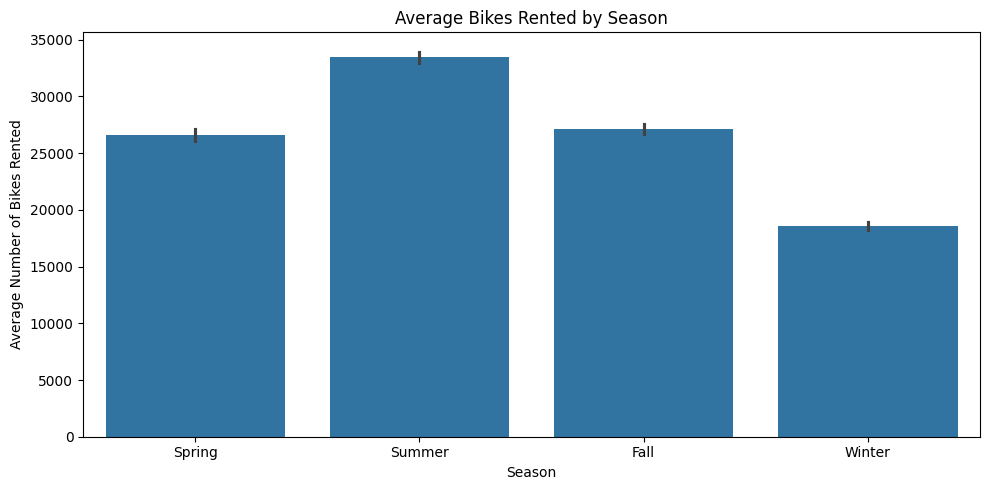

C:\Users\Tamás\AppData\Local\Temp\ipykernel_19620\1968892106.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])


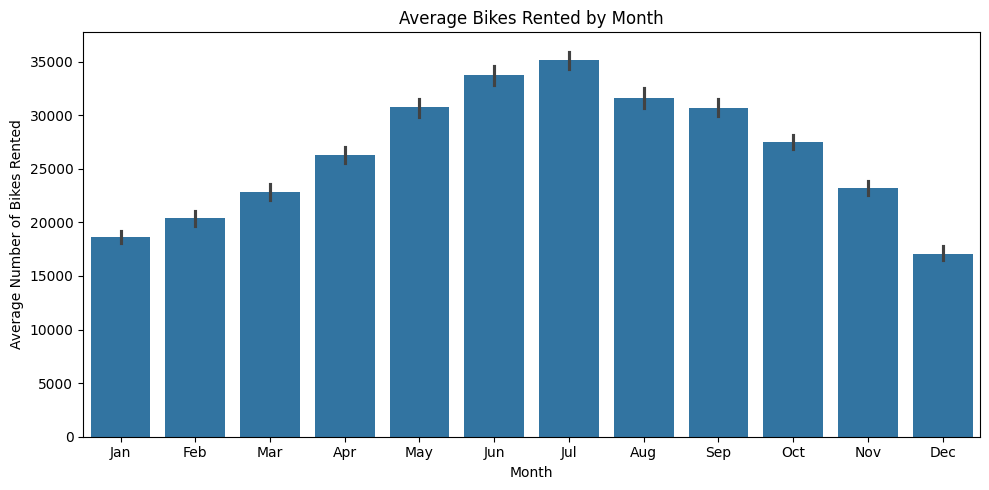

In [130]:
# The variaty of rented bikes by season and month.

# Season names mapping
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
# Month names mapping (ordered by month number)
month_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

# Average bikes rented by season
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=london_bike_copy, x="season", y="bikes_hired", estimator="mean")
ax.set_title("Average Bikes Rented by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Average Number of Bikes Rented")
ax.set_xticklabels([season_labels[s] for s in sorted(season_labels.keys())])
plt.tight_layout()
plt.show()

# Average bikes rented by month
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=london_bike_copy, x="month", y="bikes_hired", estimator="mean")
ax.set_title("Average Bikes Rented by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Number of Bikes Rented")
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.tight_layout()
plt.show()

# Caption:
# These barplots show the average number of bikes rented by season and by month. Summer months and seasons have the highest average rentals, while winter months have the lowest.

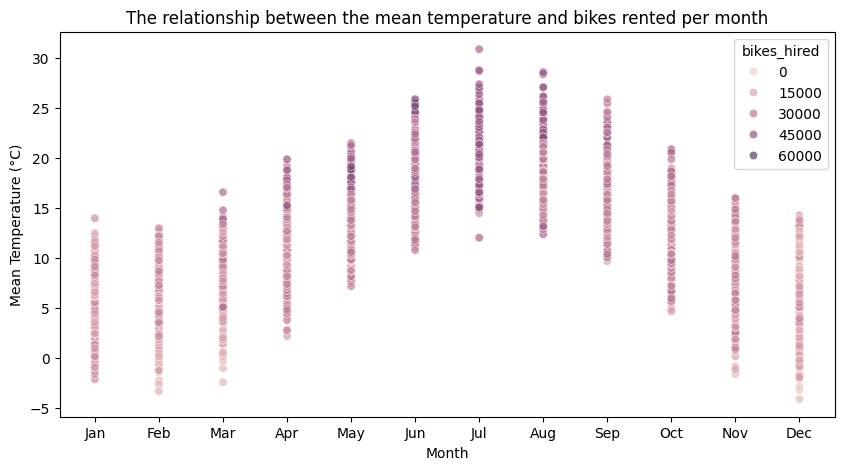

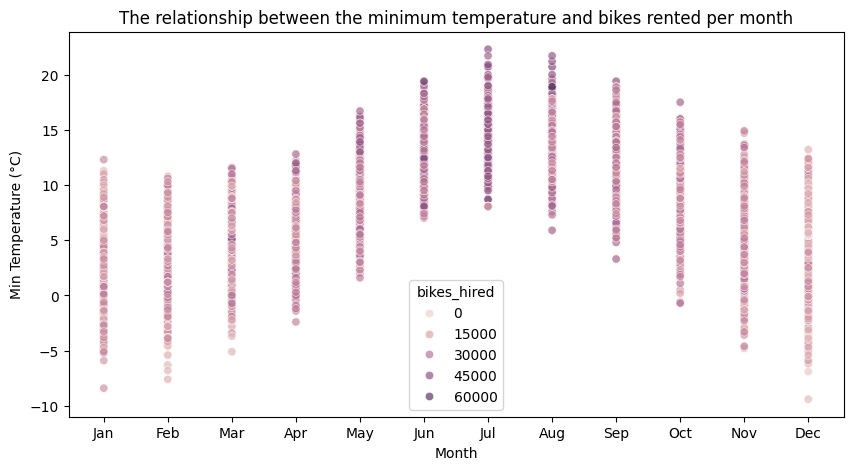

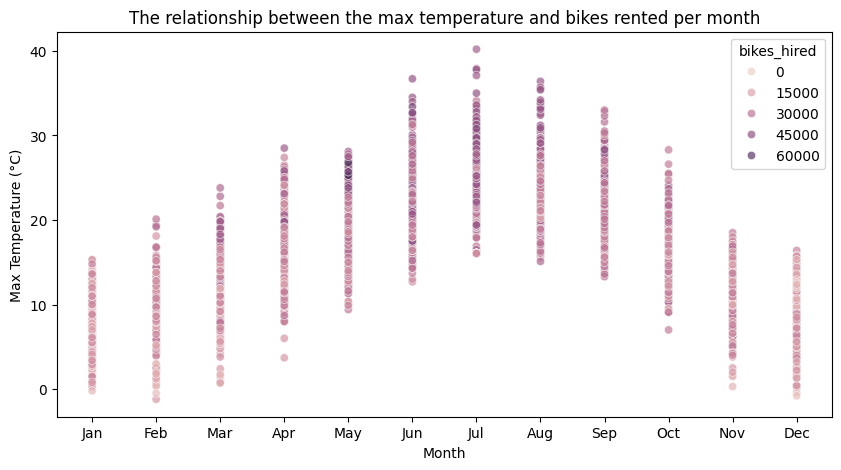

In [ ]:
# The relationship between temperature and bikes rented

# Month names mapping (ordered by month number)
month_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="mean_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the mean temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Mean Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  # Ensure all months are shown
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="min_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the minimum temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Min Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="max_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the max temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Max Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [ ]:
## Your code goes here

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [ ]:
### Your code goes here

## Deliverables
A knitted HTML, one person per group to submit